In [20]:
import pandas as pd 

df = pd.read_csv("data/WildFires_DataSet.csv")
df.head()

,NDVI,LST,BURNED_AREA,CLASS
0,0.506782,14584.272727,4.692308,no_fire
1,0.522150,14655.833333,5.000000,no_fire
2,0.682284,14780.000000,5.000000,fire
3,0.120046,13298.500000,3.500000,no_fire
4,0.568734,14743.000000,5.000000,no_fire


In [21]:
df.isna().any()

NDVI           False
LST            False
BURNED_AREA    False
CLASS          False
dtype: bool

In [22]:
#Encode CLASS (fire/no_fire -> 1/0)
from sklearn.preprocessing import LabelEncoder

enc = LabelEncoder()
df['CLASS'] = enc.fit_transform(df['CLASS'])

In [23]:
#Seperate X and y
X = df[['NDVI', 'LST', 'BURNED_AREA']]
y = df['CLASS']

X.head(3), y.head(3)

(       NDVI           LST  BURNED_AREA
 0  0.506782  14584.272727     4.692308
 1  0.522150  14655.833333     5.000000
 2  0.682284  14780.000000     5.000000,
 0    1
 1    1
 2    0
 Name: CLASS, dtype: int64)

In [24]:
#Normalize Features using MinMaxScaler, keep varables in same scale
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

df_scaled = pd.DataFrame(X_scaled, columns=['NDVI', 'LST', 'BURNED_AREA'])
df_scaled['CLASS']=y

df_scaled.head()
#Prepross done

,NDVI,LST,BURNED_AREA,CLASS
0,0.633894,0.584858,0.282051,1
1,0.654358,0.613777,0.333333,1
2,0.867589,0.663954,0.333333,0
3,0.118925,0.065264,0.083333,1
4,0.716388,0.649002,0.333333,1


In [25]:
#Train/Test Split 
#feature matrix(x) must be 2D, label vector (y)

from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(
    df_scaled[['NDVI', 'LST', 'BURNED_AREA']],
    df_scaled['CLASS'],
    test_size=0.2,
    random_state=42
)

M1: LOGISTIC REGRESSION
Accuracy:  0.8017492711370262
Training Time:  0.02209019660949707

Classification Report: 
              precision    recall  f1-score   support

           0       0.50      0.06      0.11        68
           1       0.81      0.99      0.89       275

    accuracy                           0.80       343
   macro avg       0.65      0.52      0.50       343
weighted avg       0.75      0.80      0.73       343


Confusion Matrix: 
[[  4  64]
 [  4 271]]


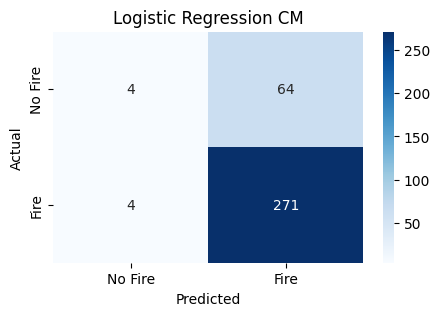

In [26]:
#Train Logistic Regression Model 

from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import time

log_model = LogisticRegression()
start = time.time()
log_model.fit(X_train, y_train)
end = time.time()

y_pred_log = log_model.predict(X_test)

print("M1: LOGISTIC REGRESSION")
print("Accuracy: ", accuracy_score(y_test, y_pred_log))
print("Training Time: ", end-start)

#Text descrip
print("\nClassification Report: ")
print(classification_report(y_test, y_pred_log))
print("\nConfusion Matrix: ")
conf_matrix = confusion_matrix(y_test, y_pred_log)
print(conf_matrix)
#Visualize Confusion Matrix
plt.figure(figsize=(5,3))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", 
            xticklabels = ['No Fire', 'Fire'], 
            yticklabels = ['No Fire', 'Fire'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Logistic Regression CM")
plt.show()

M2: Random Forest
Accuracy:  0.8571428571428571
Training Time: 0.23521804809570312

Classification Report: 
              precision    recall  f1-score   support

           0       0.69      0.51      0.59        68
           1       0.89      0.94      0.91       275

    accuracy                           0.86       343
   macro avg       0.79      0.73      0.75       343
weighted avg       0.85      0.86      0.85       343

Confusion Matrixs: 
[[ 35  33]
 [ 16 259]]


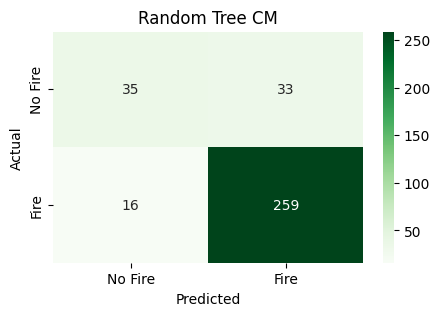

In [27]:
#Train Random Forest Model - Collection of decision trees; Class/Num 
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(
    n_estimators = 200, 
    class_weight="balanced",
    random_state=42
)
start = time.time()
rf_model.fit(X_train, y_train)
end = time.time()
y_pred_rf = rf_model.predict(X_test)

print("M2: Random Forest")
print("Accuracy: ", accuracy_score(y_test, y_pred_rf))
print("Training Time:", end - start)
print("\nClassification Report: ")
print(classification_report(y_test, y_pred_rf))
print("Confusion Matrixs: ")
conf_matrix = confusion_matrix(y_test, y_pred_rf)
print (conf_matrix)
#Visual CM 
plt.figure(figsize=(5,3))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Greens", 
            xticklabels = ['No Fire', 'Fire'],
            yticklabels = ['No Fire', 'Fire'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Random Tree CM")
plt.show()

In [29]:
#Train Neural Network (Multi-Layer Perceptron)on tabular data 
import tensorflow as tf 
from tensorflow.keras import layers, models 
import numpy as np 
import random 
import os

os.environ['PYTHONHASHSEED'] = '42'
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

#structure 
nn_model = models.Sequential([
    layers.Input(shape=(3,)),
    layers.Dense(32, activation= 'relu',),
    layers.Dense(16, activation= 'relu' ),
    layers.Dense(1, activation= 'sigmoid')
])

#compile() - set up rules of learning (How, Min, Measure)
nn_model.compile(optimizer = 'adam', loss='binary_crossentropy', metrics=['accuracy'])

start = time.time()
nn_model.fit(X_train, y_train, epochs=20, batch_size=16, verbose=0)
end = time.time()

#evaluate() - grade model on unseen 
loss, nn_acc = nn_model.evaluate(X_test, y_test, verbose=0)

print("Neural Network Mult-Layer Perceptron")
print("Loss: ", loss)
print("Accuracy: ", nn_acc)
print("Training Time: ", end-start)

nn_y_pred = nn_model(X_test).numpy()
nn_y_pred_binarys = (nn_y_pred >= 0.5).astype(int) #double -> bin F/T -> int 0/1
print(confusion_matrix(y_test, nn_y_pred_binarys))
print(classification_report(y_test, nn_y_pred_binarys))

Neural Network Mult-Layer Perceptron
Loss:  0.46101218461990356
Accuracy:  0.795918345451355
Training Time:  1.5577478408813477
[[ 10  58]
 [ 12 263]]
              precision    recall  f1-score   support

           0       0.45      0.15      0.22        68
           1       0.82      0.96      0.88       275

    accuracy                           0.80       343
   macro avg       0.64      0.55      0.55       343
weighted avg       0.75      0.80      0.75       343

